In [1]:
%%capture
# Setup: Install packages we will need in this notebook
%pip install pyfmrheo
%pip install matplotlib

In [2]:
from pyfmreader import loadfile
from pyfmrheo.routines.ViscousDragSteps import doViscousDragSteps
import matplotlib.pyplot as plt

In [3]:
# Define global parameters for plotting
plt.rcParams["figure.figsize"] = (10,5)

In [4]:
# Define path of file to process
file_path = r"../tests/testfiles/map-data-2022.10.29-14.50.36.586.jpk-force-map"

In [5]:
# Load File
file = loadfile(file_path)
filemetadata = file.filemetadata
print(filemetadata['file_type'])

jpk-force-map


In [6]:
# Get some of the file metadata
closed_loop = filemetadata['z_closed_loop']
file_deflection_sensitivity = filemetadata['defl_sens_nmbyV'] #nm/V
file_spring_constant = filemetadata['spring_const_Nbym'] #N/m
height_channel = filemetadata['height_channel_key']

deflection_sensitivity = file_deflection_sensitivity / 1e9 #m/V
spring_constant = file_spring_constant

print(f"Closed loop: {closed_loop}")
print(f"Height channel: {height_channel}")
print(f"Deflection Sens.: {deflection_sensitivity} m/V")
print(f"Spring Constant: {spring_constant} N/m")

Closed loop: false
Height channel: measuredHeight
Deflection Sens.: 1.4678505383171551e-08 m/V
Spring Constant: 0.191 N/m


In [7]:
param_dict = {
    'height_channel': height_channel,   # Channel where to find the height data
    'def_sens': deflection_sensitivity, # Deflection sensitivity in m/V
    'k': spring_constant,               # Spring constant in N/m
    'max_freq': 1e3,                    # Maximum frequency to process in Hz
    'piezo_char_data': None             # Piezo Characterization data for correction
}

In [8]:
# Select curve by index
curve_idx = 0
force_curve = file.getcurve(curve_idx)
# Preprocess curve
force_curve.preprocess_force_curve(param_dict['def_sens'], param_dict['height_channel'])

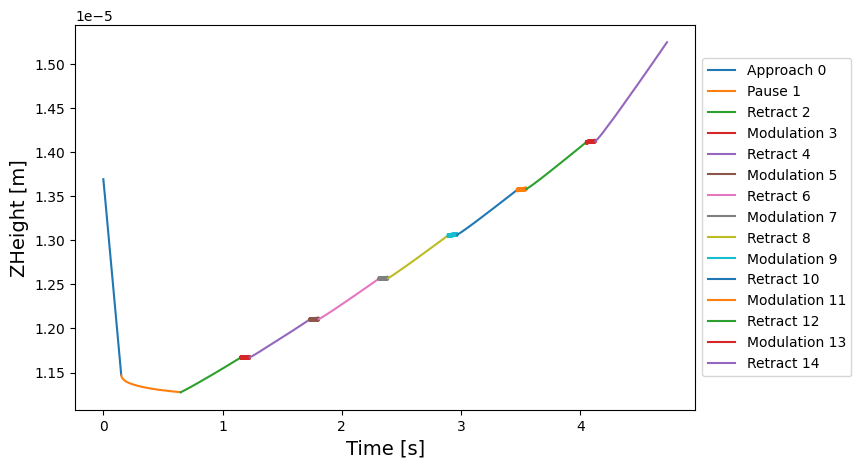

In [9]:
# Plot the force curve modulation segments
time_0 = 0
fig = plt.figure()
ax = plt.subplot(111)
for segid, segment in force_curve.get_segments():
    time = segment.time
    zheight = segment.zheight
    ax.plot(time + time_0, zheight, label=f"{segment.segment_type} {segid}")
    time_0 = time_0 + time[-1]
ax.set_xlabel("Time [s]", fontsize = 14)
ax.set_ylabel("ZHeight [m]", fontsize=14)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [10]:
# JPK files require the height signal to be shifted
if filemetadata['file_type'] in ('jpk-force', 'jpk-force-map', 'jpk-qi-data'):
    force_curve.shift_height()

In [11]:
# Compute Bh
frequencies_results, Bh_results, Hd_results, gamma2_results, distances, fi_results, amp_quotient_results = doViscousDragSteps(force_curve, param_dict)

The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0


C:\Users\javier.lopez\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1867: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


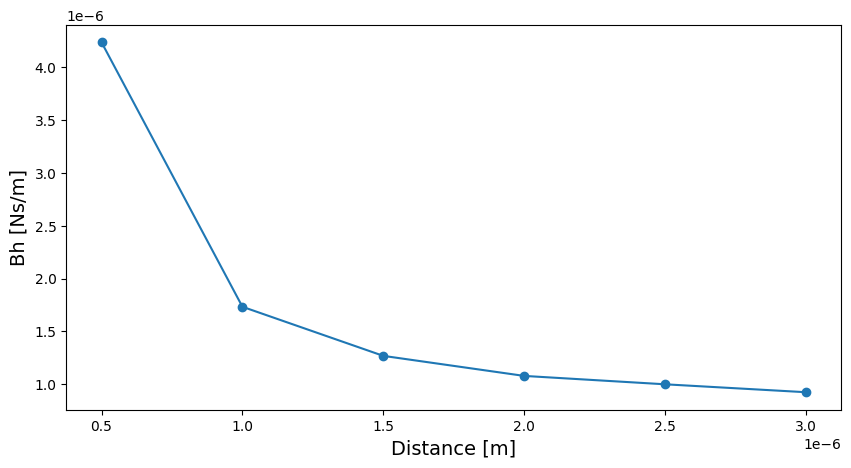

In [12]:
#Plot Bh results
plt.plot(distances, Bh_results, '-o')
plt.xlabel("Distance [m]", fontsize = 14)
plt.ylabel("Bh [Ns/m]", fontsize = 14)
plt.show()